In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import pandas as pd
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
# Fuctions

def snr(data):  
    singleChannel = data
    try:
        singleChannel = numpy.sum(data, axis=1)
    except:
        pass
    norm = singleChannel / float(max(np.amax(singleChannel), -1 * np.amin(singleChannel)))

    return stats.signaltonoise(norm)

def ex(X):
    mu = np.sum((X-np.mean(X))**4)/(X.shape[0]-1)
    return mu/(sigma(X)**4) -3

def sigma(X):
    return np.sqrt(sum((X - np.mean(X))**2)/len(X)) #sigma  

In [3]:
def comuteParams(setName, typeAudio):
    dataframe = pd.read_csv(str(setName) + '_label.csv')
    
    sigmaFeature = []
    variance = []
    mean = []
    signalToNoiseRatio = []
    excess = []
    
    if (typeAudio == 'spoof'):
        nameFile = dataframe[dataframe.Type=='spoof'].FileID
    elif (typeAudio == 'original'):
        nameFile = dataframe[dataframe.Type=='genuine'].FileID
    else:
        print 'Error'
        
    for i in nameFile:
        rate, audio = wavfile.read('./ASVspoof2017_train_dev/wav/' + str(setName)+'/' + i)
        sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))

        signalToNoiseRatio.append(snr(audio))
        variance.append(sigmaAudio**2)
        sigmaFeature.append(sigmaAudio)
        mean.append(np.mean(audio))
        excess.append(ex(audio))

    return sigmaFeature , variance, mean, signalToNoiseRatio, excess

In [4]:
sigmaVectorOriginal,varOriginal,meanOriginal,snrOriginal, exOriginal = comuteParams('train', 'original')

In [5]:
sigmaVectorSpoof,varSpoof,meanSpoof,snrSpoof, exSpoof = comuteParams('train', 'spoof')

In [6]:
def makePlots(sigmaVectorOriginal,varOriginal,meanOriginal,snrOriginal, exOriginal,\
              sigmaVectorSpoof,varSpoof,meanSpoof,snrSpoof, exSpoof):
    
    plt.figure(figsize=(20,7))
    plt.plot(varSpoof, color = 'blue', label="spoof")
    plt.title('variance')
    plt.plot(varOriginal, color = 'red', label="original")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,5))
    plt.title('Sigma + Variance')
    plt.scatter(sigmaVectorSpoof, varSpoof, label="spoof")
    plt.scatter(sigmaVectorOriginal,varOriginal, color = 'red',edgecolors='yellow', label="original")
    plt.legend()
    plt.show()
    
    
    plt.figure(figsize=(20,7))
    plt.plot(snrSpoof, color = 'blue', label="spoof")
    plt.title('Signal to noise ratio')
    plt.plot(snrOriginal, color = 'red', label="original")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,7))
    plt.plot(exSpoof, color = 'blue', label="spoof")
    plt.title('excess')
    #plt.ylim(0,20)
    #plt.xlim (0,200)
    plt.plot(exOriginal, color = 'red', label="original")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,10))
    plt.title('Train dataset representation on 2D space (snr - ex)', size = 30)
    plt.scatter(exSpoof, snrSpoof,  label="spoof")
    plt.scatter(exOriginal,snrOriginal, color = 'yellow', edgecolors='red', label="original")
    plt.legend()
    plt.show()
    

In [7]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

def makePlotsPlotly(sigmaVectorOriginal,varOriginal,meanOriginal,snrOriginal, exOriginal,\
              sigmaVectorSpoof,varSpoof,meanSpoof,snrSpoof, exSpoof):
    
    
    trace1 = go.Scatter( x = range(len(varOriginal)), y = varOriginal, name = 'variance original')
    trace2 = go.Scatter( x = range(len(varSpoof)), y = varSpoof, name = 'variance spoofing')
    iplot([trace1, trace2])

    trace3 = go.Scatter(x = sigmaVectorSpoof,y = varSpoof, mode = 'markers', name = 'sigma spoofing')
    trace4 = go.Scatter(x = sigmaVectorOriginal,y = varOriginal, mode = 'markers',name = 'sigma original')
    iplot([trace3, trace4])
    
    trace5 = go.Scatter(x = range(len(snrSpoof)),y = snrSpoof,name = 'snr spoofing')
    trace6 = go.Scatter(x = range(len(snrOriginal)),y = snrOriginal,name = 'snr original')
    iplot([trace5, trace6])

    trace7 = go.Scatter(x = range(len(exSpoof)),y = exSpoof, name = 'excess spoofing')
    trace8 = go.Scatter(x = range(len(exOriginal)),y = exOriginal,name = 'excess original')
    iplot([trace7, trace8])
    
    trace9 = go.Scatter(x = exSpoof,y = snrSpoof,mode = 'markers',name = 'ex-snr spoofing')
    trace10 = go.Scatter(x = exOriginal,y = snrOriginal, mode = 'markers', name = 'ex-snr original')
    iplot([trace9, trace10])


In [8]:
makePlotsPlotly(sigmaVectorOriginal,varOriginal,meanOriginal,snrOriginal, exOriginal,\
              sigmaVectorSpoof,varSpoof,meanSpoof,snrSpoof, exSpoof)

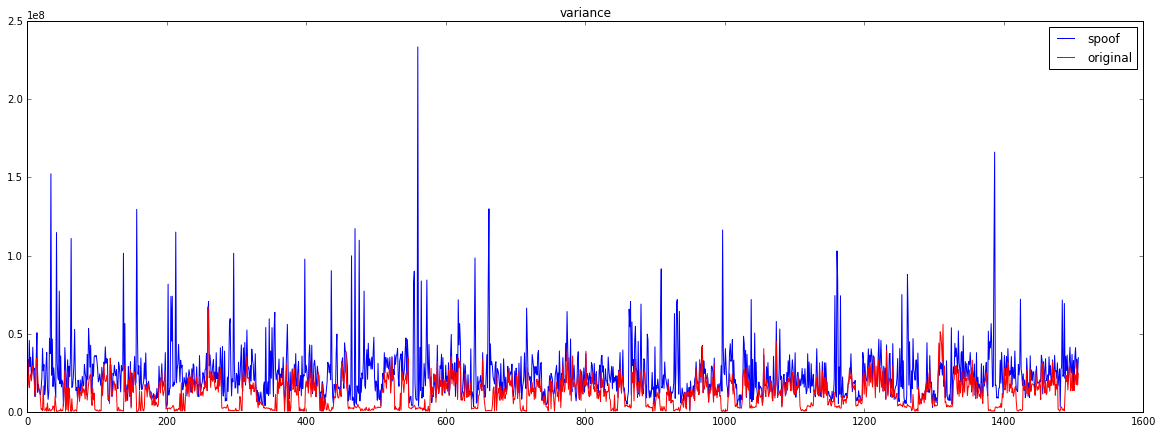

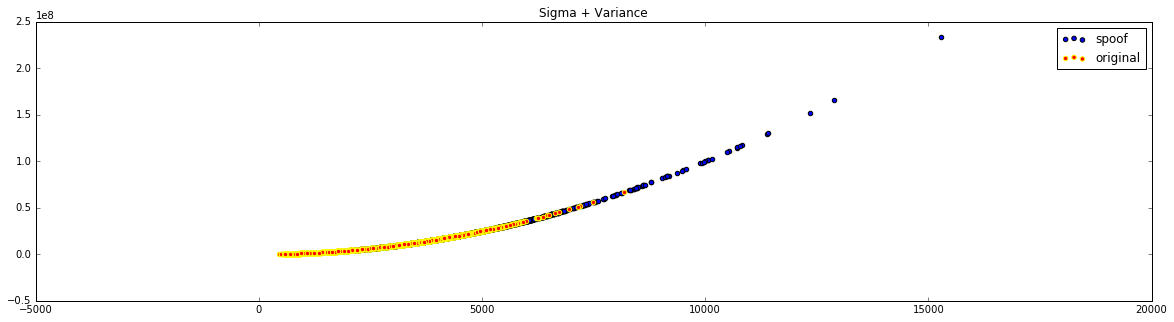

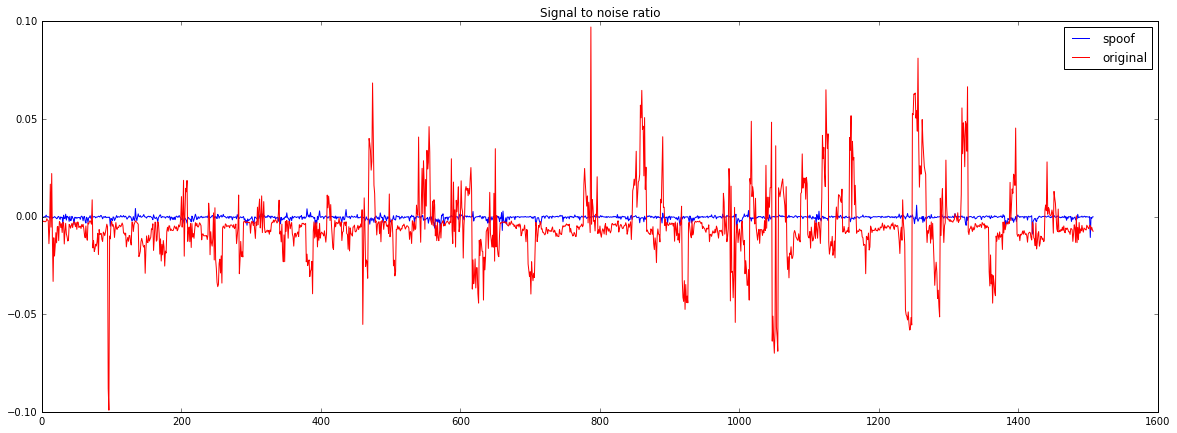

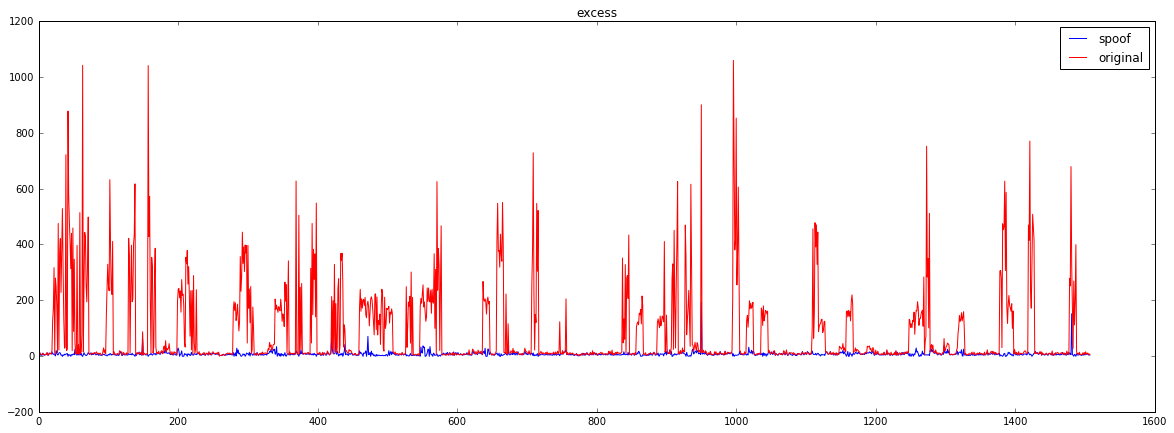

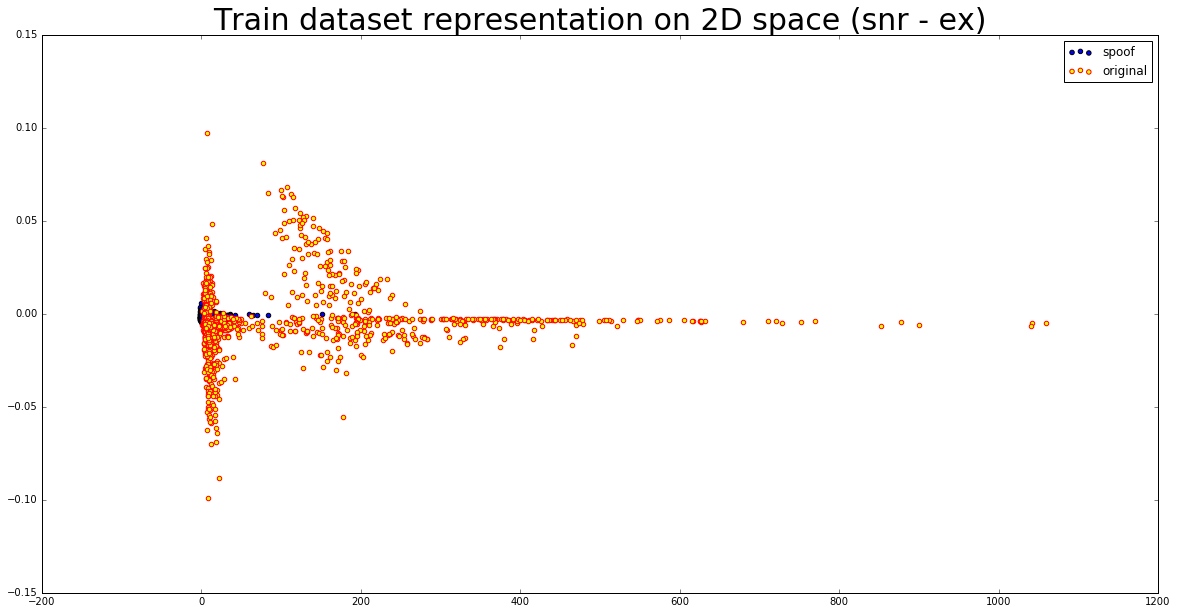

In [9]:
makePlots(sigmaVectorOriginal,varOriginal,meanOriginal,snrOriginal, exOriginal,\
              sigmaVectorSpoof,varSpoof,meanSpoof,snrSpoof, exSpoof)

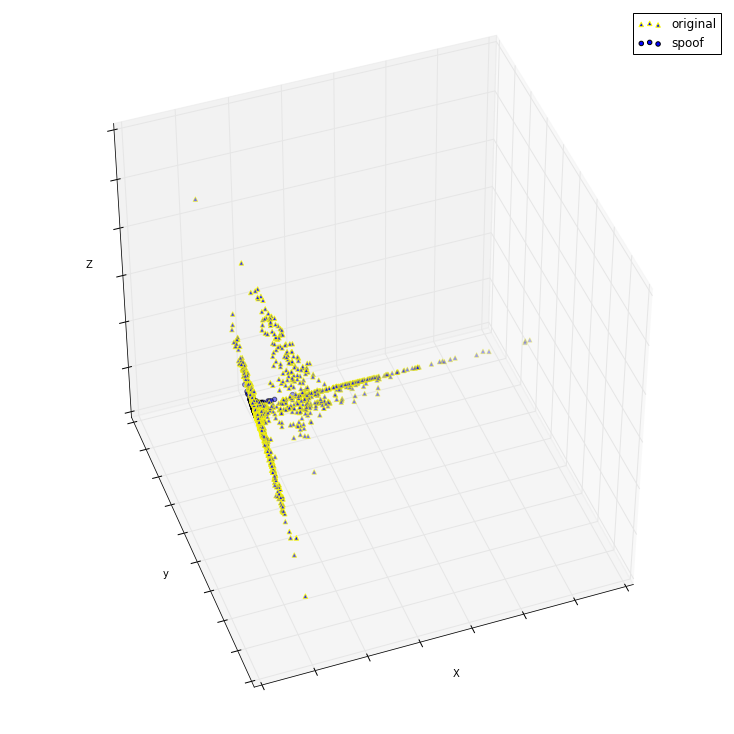

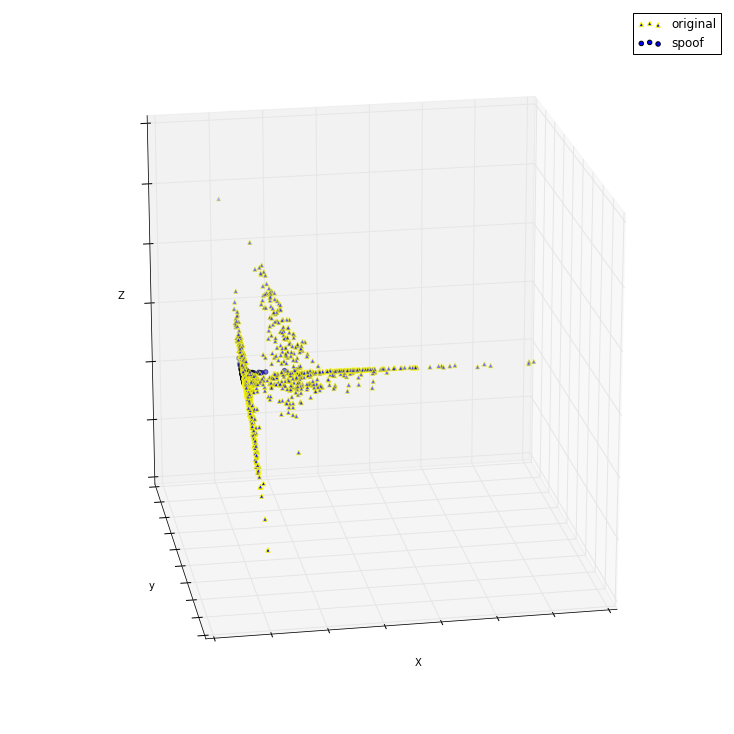

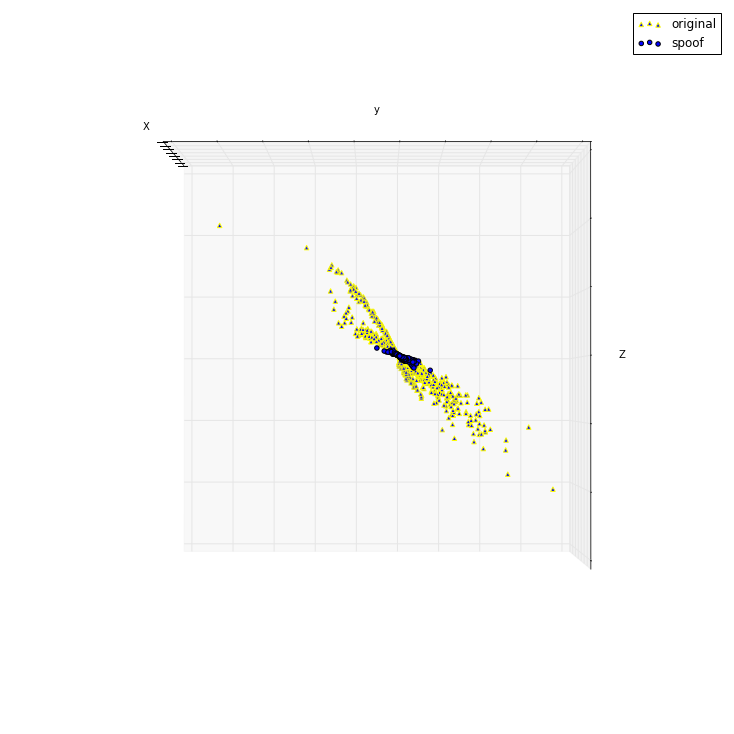

In [10]:
# 3D representation

def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(10, 10))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(exOriginal,meanOriginal, snrOriginal, color = 'red',edgecolor = 'yellow', marker ='^', label = 'original')
    ax.scatter(exSpoof,meanSpoof, snrSpoof,  marker ='o', label = 'spoof')
    
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_zlabel('Z')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.legend()

elev = 43.5
azim = -110
plot_figs(1, elev, azim)

elev = 20
azim = -100

plot_figs(2, elev, azim)

elev = -.5
azim = 180
plot_figs(3, elev, azim)

plt.show()



In [11]:
# 3D representation

def plot_figs3D():
    

    trace1 = go.Scatter3d(
    x=exOriginal,
    y=meanOriginal,
    z=snrOriginal,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
        )
    )
    
    trace2 = go.Scatter3d(
    x=exSpoof,
    y=meanSpoof,
    z=snrSpoof,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
        )
    )
    iplot([trace1, trace2])
    
plot_figs3D()

In [12]:
sigmaVectorOriginalD,varOriginalD,meanOriginalD,snrOriginalD, exOriginalD = comuteParams('dev', 'original')

In [13]:
sigmaVectorSpoofD,varSpoofD,meanSpoofD,snrSpoofD, exSpoofD = comuteParams('dev', 'spoof')

In [14]:
makePlotsPlotly(sigmaVectorOriginalD,varOriginalD,meanOriginalD,snrOriginalD, exOriginalD,\
              sigmaVectorSpoofD,varSpoofD,meanSpoofD,snrSpoofD, exSpoofD)

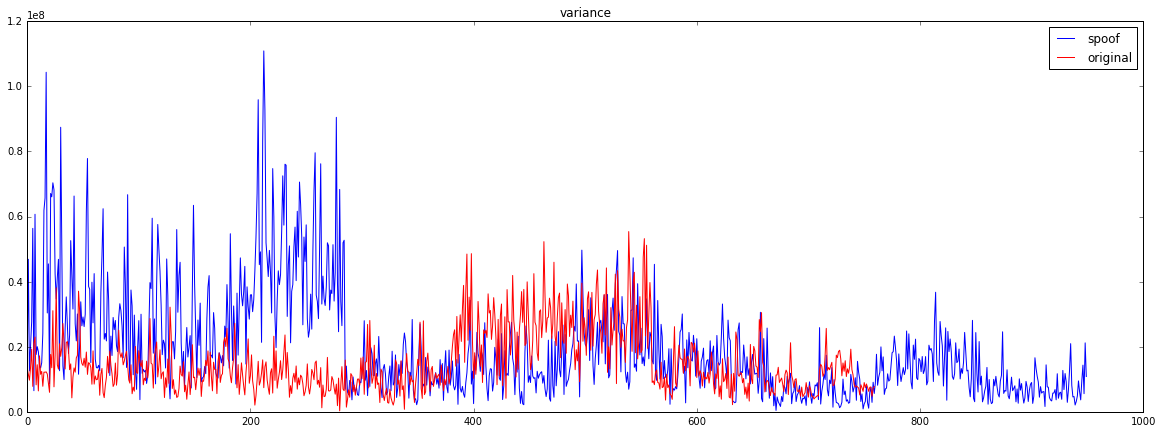

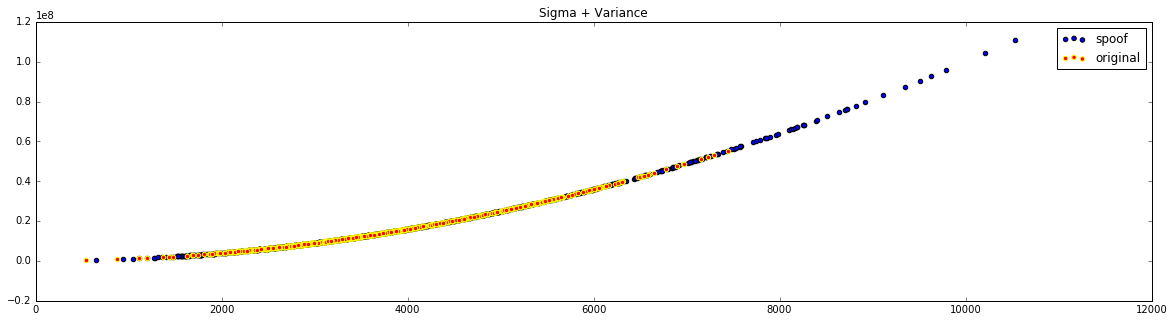

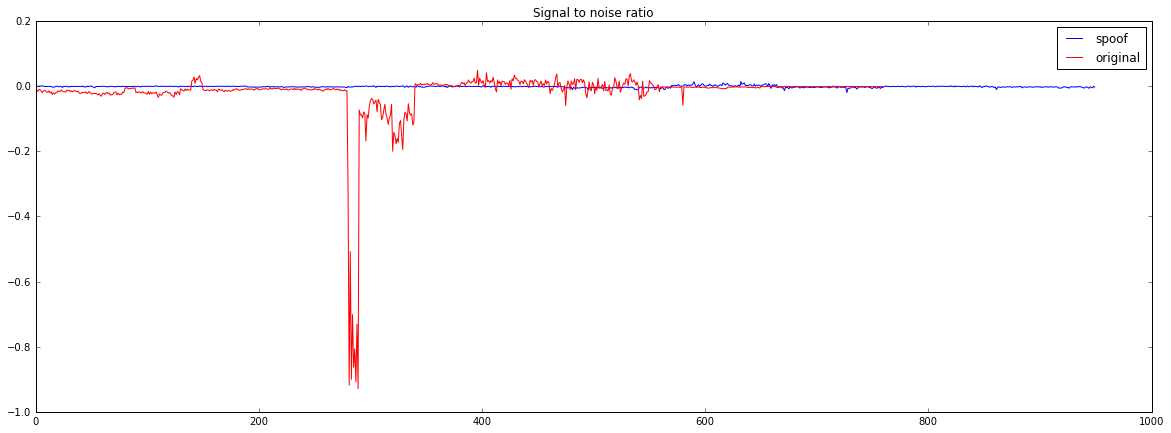

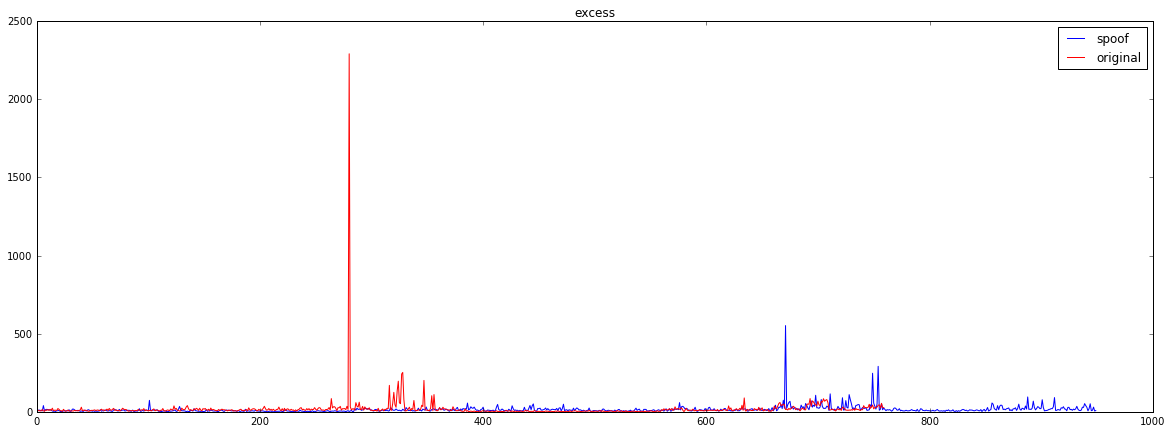

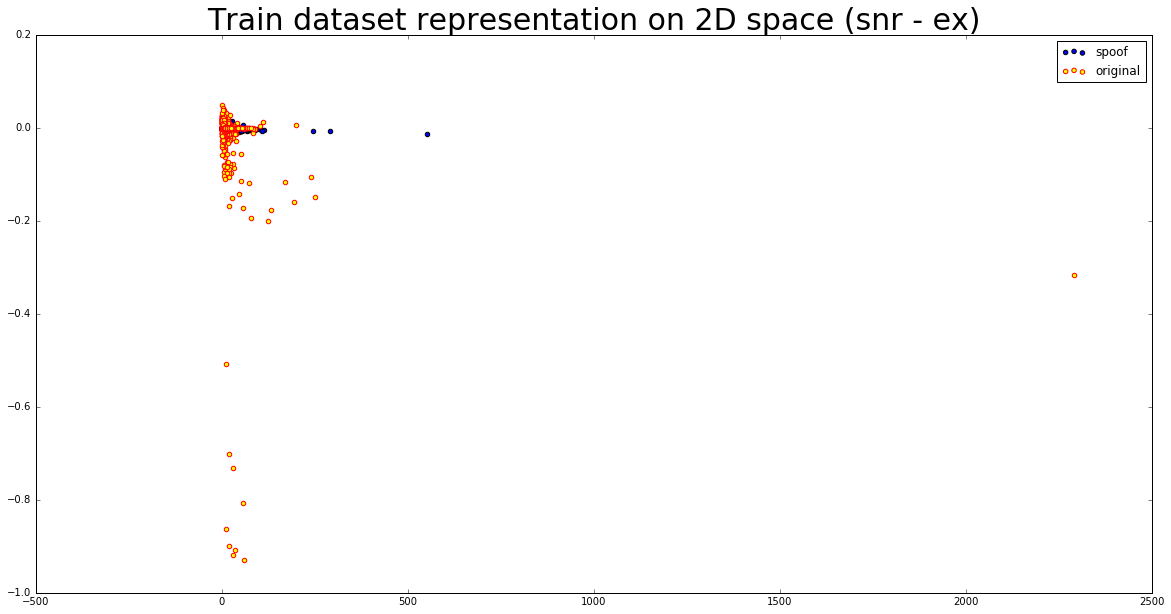

In [15]:
makePlots(sigmaVectorOriginalD,varOriginalD,meanOriginalD,snrOriginalD, exOriginalD,\
              sigmaVectorSpoofD,varSpoofD,meanSpoofD,snrSpoofD, exSpoofD)

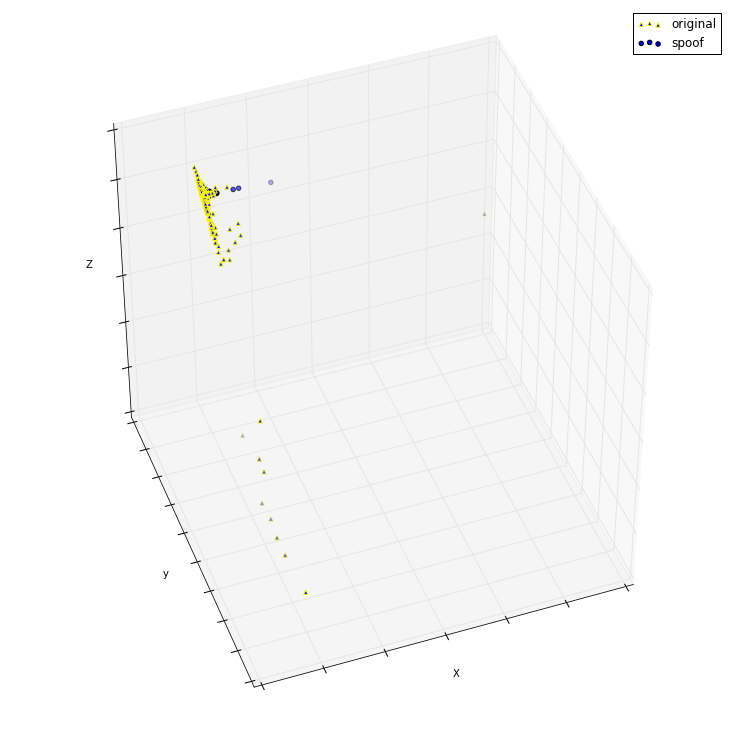

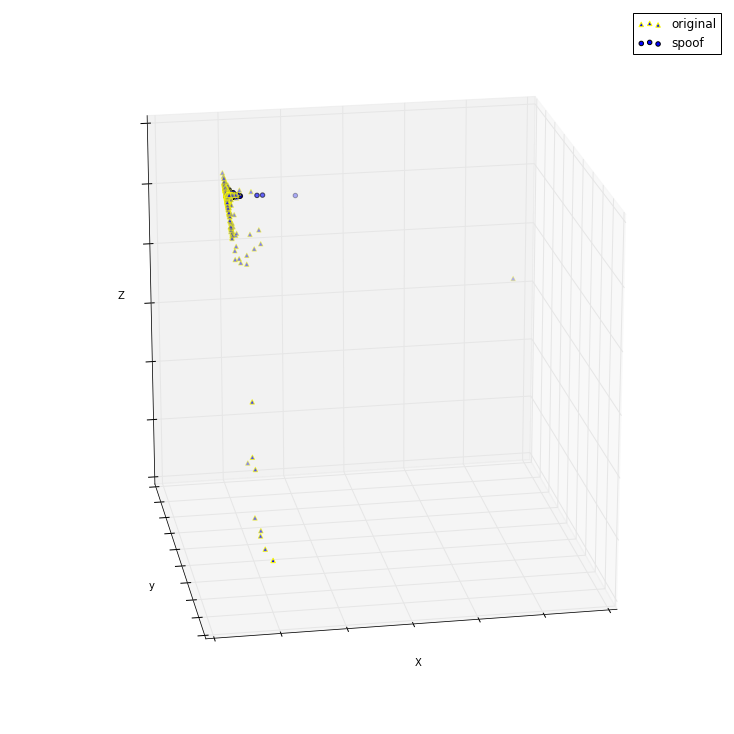

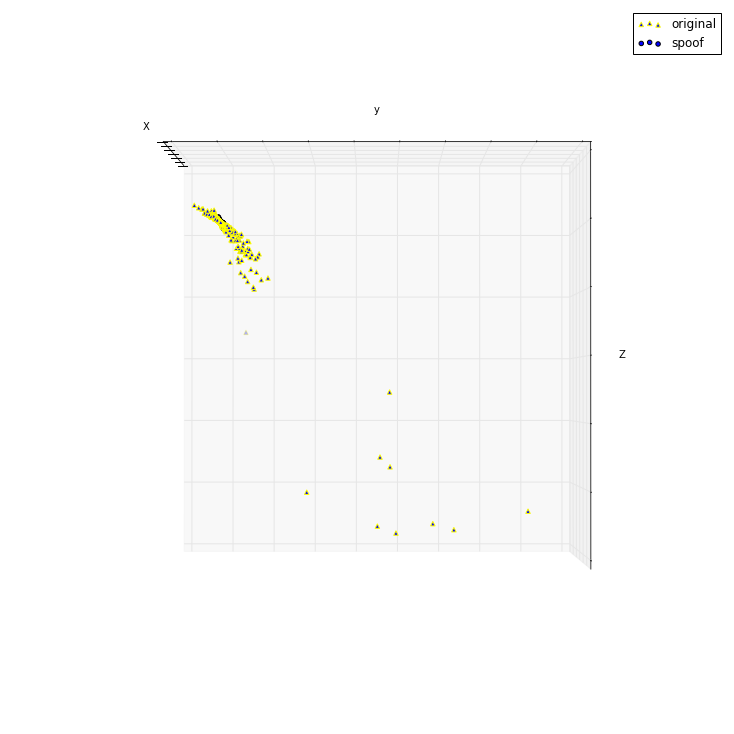

In [16]:
# 3D representation

def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(10, 10))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(exOriginalD,meanOriginalD, snrOriginalD, color = 'red',edgecolor = 'yellow', marker ='^', label = 'original')
    ax.scatter(exSpoofD,meanSpoofD, snrSpoofD,  marker ='o', label = 'spoof')
    
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_zlabel('Z')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.legend()

elev = 43.5
azim = -110
plot_figs(1, elev, azim)

elev = 20
azim = -100

plot_figs(2, elev, azim)

elev = -.5
azim = 180
plot_figs(3, elev, azim)

plt.show()



# Evaluation Set

In [17]:
def EvaLabel():
    dataframe = pd.read_csv('eva_label.csv')
    
    sigmaFeature = []
    variance = []
    mean = []
    signalToNoiseRatio = []
    excess = []

    nameFile = dataframe.FileID

    for i in nameFile:
        rate, audio = wavfile.read('./ASVspoof2017_eval/eval/'  + str(i))
        sigmaAudio = np.sqrt(sum((audio - audio.mean())**2)/len(audio))

        signalToNoiseRatio.append(snr(audio))
        variance.append(sigmaAudio**2)
        sigmaFeature.append(sigmaAudio)
        mean.append(np.mean(audio))
        excess.append(ex(audio))

    return sigmaFeature , variance, mean, signalToNoiseRatio, excess

In [18]:
sigmaVectorOriginalEva,varOriginalEva,meanOriginalEva,snrOriginalEva, exOriginalEva = EvaLabel()


In [19]:
dataframe = pd.read_csv('eva_label.csv')
print dataframe.shape

(14220, 2)


In [20]:
def evaPlots(sigma,var,mean,snr, ex):
    
    plt.figure(figsize=(20,7))
    plt.plot(var, color = 'blue')
    plt.title('variance')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,5))
    plt.title('Sigma + Variance')
    plt.scatter(sigma, var)
    plt.show()
    
    
    plt.figure(figsize=(20,7))
    plt.plot(snr, color = 'blue')
    plt.title('Signal to noise ratio')
    plt.show()
    
    plt.figure(figsize=(20,7))
    plt.plot(ex, color = 'blue')
    plt.title('excess')
    #plt.ylim(0,20)
    #plt.xlim (0,200)
    plt.show()
    
    plt.figure(figsize=(20,10))
    plt.title('Train dataset representation on 2D space (snr - ex)', size = 30)
    plt.scatter(ex, snr)
    plt.show()
    

C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



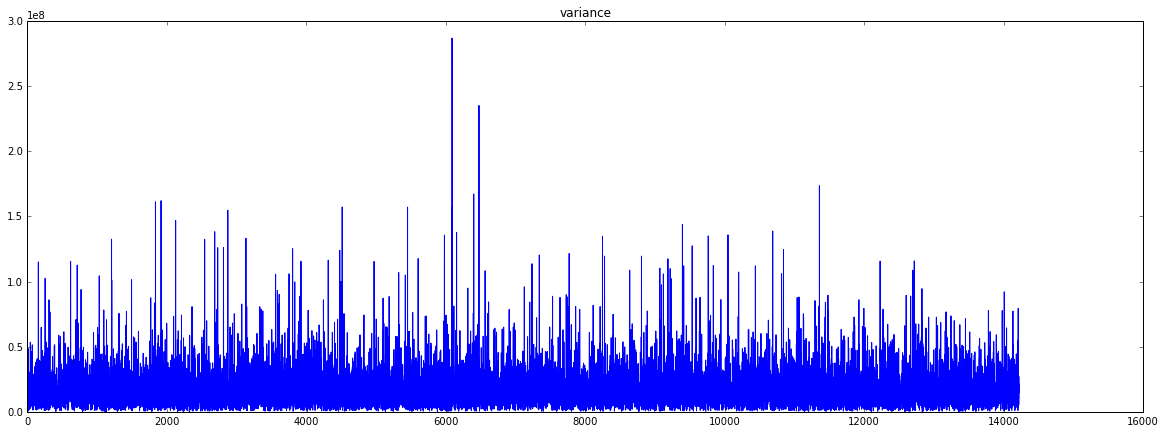

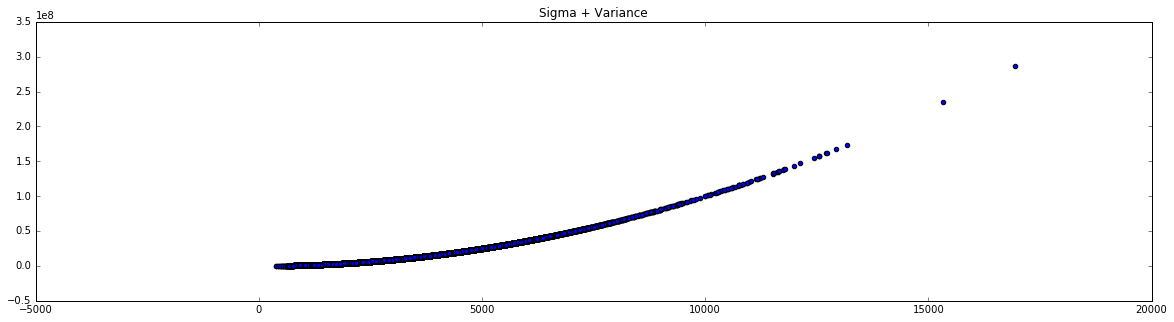

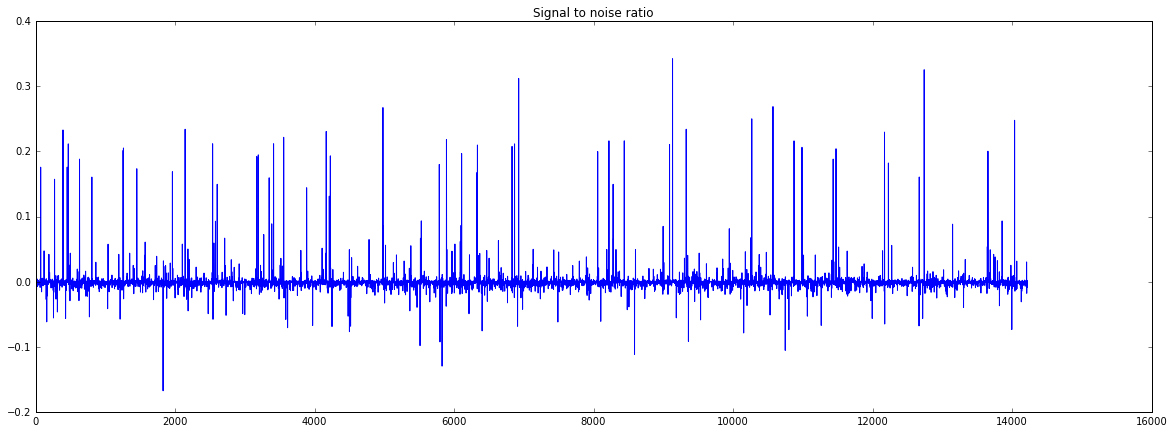

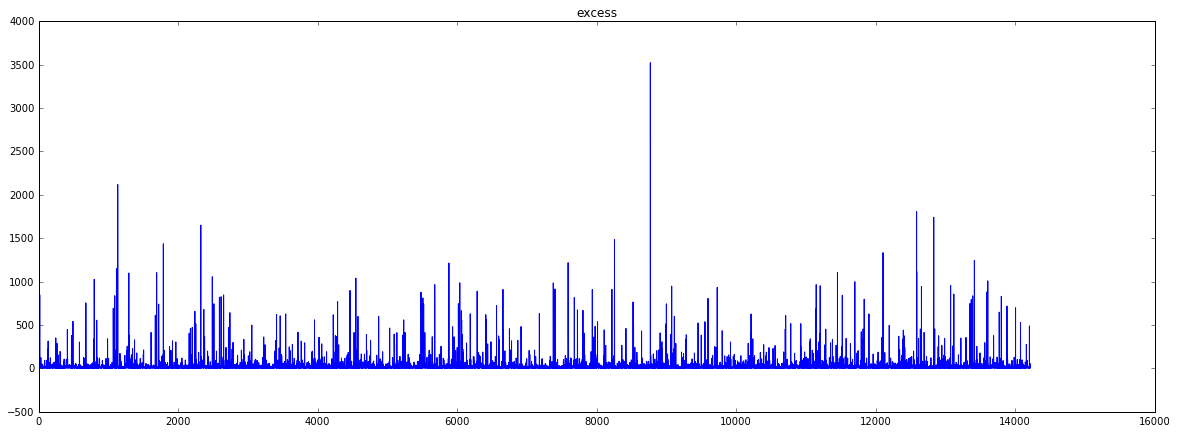

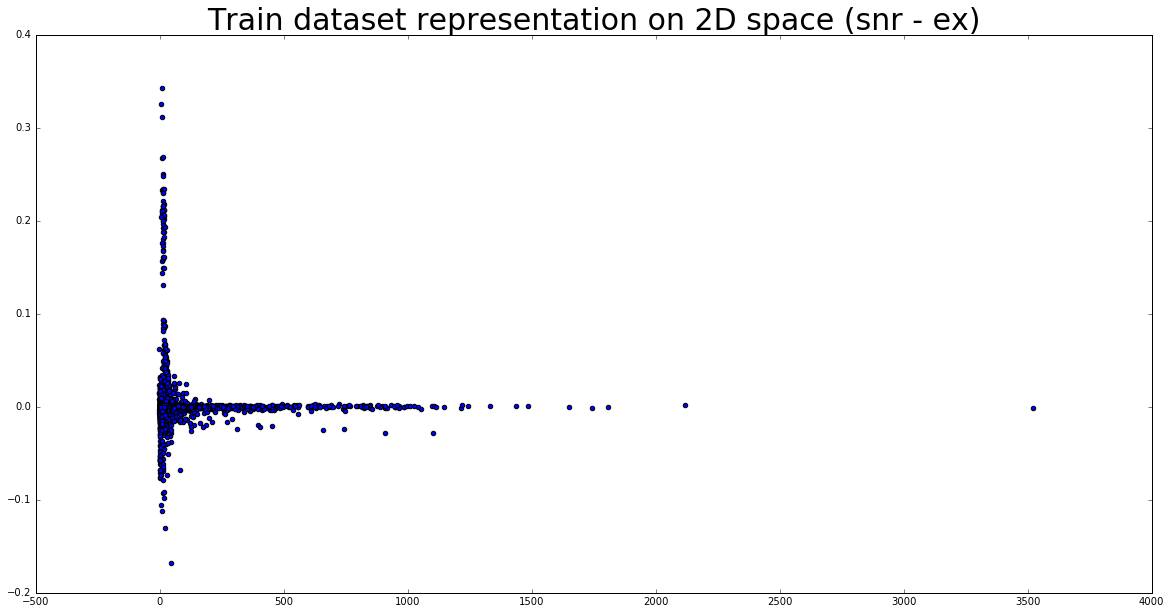

In [21]:
evaPlots(sigmaVectorOriginalEva,varOriginalEva,meanOriginalEva,snrOriginalEva, exOriginalEva)

# Make dataset

In [22]:
X_train_original = np.vstack([sigmaVectorOriginal, meanOriginal,  varOriginal, snrOriginal, exOriginal ]).T
X_train_spoof = np.vstack([sigmaVectorSpoof, meanSpoof,  varSpoof, snrSpoof, exSpoof]).T

X_dev_original = np.vstack([sigmaVectorOriginalD,varOriginalD,meanOriginalD,snrOriginalD, exOriginalD]).T
X_dev_spoof = np.vstack([sigmaVectorSpoofD, meanSpoofD,  varSpoofD, snrSpoofD, exSpoofD]).T


In [211]:
X_eva = np.vstack([sigmaVectorOriginalEva,meanOriginalEva,varOriginalEva,snrOriginalEva, exOriginalEva]).T

In [24]:
np.savetxt('X_train_original.txt', X_train_original)
np.savetxt('X_train_spoof.txt', X_train_spoof)
np.savetxt('X_dev_original.txt', X_dev_original)
np.savetxt('X_dev_spoof.txt', X_dev_spoof)
np.savetxt('X_eva.txt', X_eva)

In [25]:
X_train = np.vstack([X_train_original, X_train_spoof])
X_dev = np.vstack([X_dev_original, X_dev_spoof])

y_train = np.concatenate([np.zeros(X_train_original.shape[0]), np.ones(X_train_spoof.shape[0])])
y_dev = np.concatenate([np.zeros(X_dev_original.shape[0]), np.ones(X_dev_spoof.shape[0])])

# Export data

In [26]:
X_train_original = np.loadtxt('./X_train_original.txt')
X_train_spoof = np.loadtxt('./X_train_spoof.txt')


# Classifier 

In [27]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

clf = Perceptron ( random_state=241)
clf.fit (X_train, y_train )
predictions = clf.predict(X_dev)
score = accuracy_score(y_dev,predictions)
print score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)

clf = Perceptron(random_state=241)
clf.fit(X_train_scaled, y_train)
prediciton = clf.predict(X_dev_scaled)

score_scaled= accuracy_score(prediciton, y_dev)

print score_scaled

0.555555555556
0.216374269006


In [28]:
from sklearn.svm import SVC
clf = SVC()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)

clf.fit(X_train_scaled, y_train)
prediciton = clf.predict(X_dev_scaled)

score_scaled= accuracy_score(prediciton, y_dev)
print score_scaled

0.901754385965


In [30]:
from sklearn.mixture import GMM

for n_g in xrange(1,10):

    g1 =  GMM(n_components = n_g, covariance_type='full',init_params='wmc', n_iter=20)
    g1.fit(X_train_original)

    g2 =  GMM(n_components = n_g, covariance_type='full',init_params='wmc', n_iter=20)
    g2.fit(X_train_spoof)

    prediction  = np.array(np.log(X_train_original.shape[0])+ g1.score(X_dev)  < np.log(X_train_spoof.shape[0])+g2.score(X_dev)).astype('int')

    accuracy = np.mean(prediction == y_dev) * 100

    print 'n_g = %d, accuracy =  %f' %(n_g, accuracy)

n_g = 1, accuracy =  90.760234
n_g = 2, accuracy =  82.865497
n_g = 3, accuracy =  80.526316
n_g = 4, accuracy =  76.432749
n_g = 5, accuracy =  81.695906
n_g = 6, accuracy =  76.374269
n_g = 7, accuracy =  77.251462
n_g = 8, accuracy =  74.970760
n_g = 9, accuracy =  75.555556


# UBM

In [31]:
def computeUBM(ubm_model, data):
    
    ###########################################
    # ubm_model - gmm-represent distribution of our model
    # data - samples, which will correct ubm-model
    ###############################################
    
    xdim = data.shape[1]
    M = ubm_model.n_components
    
    ###############################################################   
    #    ubm_means: means of the ubm <number array>               #
    #    ubm_covars: covariances of the ubm <number array>        #
    #    ubm_weights: weights of the ubm <number array>           #
    #    new_means: means adapted from the ubm <number array>     #
    #    new_weights: weights adapted from the ubm <number array> #
    ###############################################################    
        
    # Copy parameters GMM-model
    ubm_weights = ubm_model.weights_
    ubm_means = ubm_model.means_
    ubm_covars = ubm_model.covars_
           
    ###################################################################
    # for X = {x_1, ..., x_T}                                         # 
    # P(i|x_t) = w_i * p_i(x_t) / sum_j=1_M(w_j * P_j(x_t))           #
    ###################################################################
    
    posterior_prob = ubm_model.predict_proba(data)
    pr_i_xt = (ubm_weights * posterior_prob)/ np.asmatrix(np.sum(ubm_weights \
                                                * posterior_prob, axis = 1)).T

    n_i = np.asarray(np.sum(pr_i_xt, axis = 0)).flatten() # [M, ]
    
    # Then we can compute E(x) and E(x2) and calculate new parameters of
    # our model
    
    E_x = np.asarray([(np.asarray(pr_i_xt[:, i]) * data).sum(axis = 0) / n_i[i] for i in range(M)]) # [M x xdim]  
    E_x2 = np.asarray([(np.asarray(pr_i_xt[:, i]) * (data**2)).sum(axis = 0) / n_i[i] for i in range(M)])# [M x xdim]

    ################################################################ 
    #    T: scaling factor, number of samples                      #
    #    relevance_factor: factor for scaling the adapted means    #
    #    scaleparam - scale parameter for weights matrix estimation#
    ################################################################  
    
    T = data.shape[0]   
    relevance_factor = 16
    scaleparam = 1
    
    ################################################################      
    # compute alpha_i: data-depentend apaptation coefficient       #
    # alpha_w = alpha_m = alpha_v                                  #
    # alpha_i = n_i/ (n_i + relevance factor)                      #
    ################################################################
    
    alpha_i = n_i / (n_i + relevance_factor)

    ###############################
    # Parqameter`s adaptation
    ##############################
    new_weights = (alpha_i * n_i / T + (1.0 - alpha_i)* ubm_weights) * scaleparam       
    
    alpha_i = np.asarray(np.asmatrix(alpha_i).T)    
    new_means = (alpha_i * E_x + (1. - alpha_i) * ubm_means)      
    new_covars = alpha_i * E_x2 + (1. - alpha_i) * (ubm_covars + (ubm_means **2)) - (new_means ** 2)

    #############################################
    #if we want compute `full` covariance matrix - comment code here
    #new_covars = np.zeros([M, xdim, xdim])
    #for j in range(M):
    #    new_covars[j] = alpha_i[j]*E_x2[j] +(1. - alpha_i[j]).flatten()*(ubm_covars[j] + (new_means[j]**2))- (ubm_means[j]**2)
    #    new_covars[i] = np.where(new_covars[i] < MIN_VARIANCE, MIN_VARIANCE, new_covars[i])
    ####################################################################
    #   `covars_` : array
    #    Covariance parameters for each mixture component.  The shape
    #    depends on `covariance_type`::
    #        (n_components, n_features)             if 'spherical',
    #        (n_features, n_features)               if 'tied',
    #        (n_components, n_features)             if 'diag',
    #        (n_components, n_features, n_features) if 'full'
    #####################################################################

    
    ubm_model.means_ = new_means
    ubm_model.weights_ = new_weights
    ubm_model.covars_ = new_covars

    return ubm_model

In [32]:
from sklearn.cross_validation import StratifiedKFold

In [33]:
skf = StratifiedKFold(np.ones(X_train_original.shape[0]), n_folds=5)


for train_index, test_index in skf:
    X_tr_original_learn, X_tr_original_test = X_train_original[train_index], X_train_original[test_index]
    
    
skf2 = StratifiedKFold(np.ones(X_train_spoof.shape[0]), n_folds=5)
for train_index, test_index in skf2:
    X_tr_spoof_learn, X_tr_spoof_test = X_train_spoof[train_index], X_train_spoof[test_index]

In [309]:
n_g = 1
g1m =  GMM(n_components = n_g, covariance_type='diag',init_params='wmc', n_iter=30)
g1m.fit(X_tr_original_learn)

g2m =  GMM(n_components = n_g, covariance_type='diag',init_params='wmc', n_iter=30)
g2m.fit(X_tr_spoof_learn)

prediction  = np.array(np.log(X_tr_original_learn.shape[0])+ g1m.score(X_dev)  < np.log(X_tr_spoof_learn.shape[0])+g2m.score(X_dev)).astype('int')

accuracy = np.mean(prediction == y_dev) * 100
print 'accuracy - prediction on development set', accuracy


g1_adapt = computeUBM(g1m, X_tr_original_test)
g2_adapt = computeUBM(g2m, X_tr_spoof_test)

prediction  = np.array(g1_adapt.score(X_dev)  < g2_adapt.score(X_dev)).astype('int')
accuracy = np.mean(prediction == y_dev) * 100
print 'accuracy - prediction on development set. adapted on 1 part train set', accuracy

accuracy - prediction on development set 90.8187134503
accuracy - prediction on development set. adapted on 1 part train set 94.269005848


In [91]:
# generate result representation

In [321]:
result_score_diff  = np.array((np.log(X_tr_original_learn.shape[0])+ g1_adapt.score(X_eva))  - (np.log(X_tr_spoof_learn.shape[0])+g2_adapt.score(X_eva)))

dataframe = pd.read_csv('eva_label.csv')
filenames = np.asarray(dataframe.FileID)

splitnames = []
for i in range(filenames.shape[0]):
    splitnames.append(filenames[i][:9]) 
splitnames = np.asarray(splitnames)

score_array = np.vstack([splitnames, result_score_diff]).T

In [326]:
splitnames

array(['E_1000001', 'E_1000002', 'E_1000003', ..., 'E_1014218',
       'E_1014219', 'E_1014220'], 
      dtype='|S9')

In [322]:
labels = np.array( g1_adapt.score(X_eva) < g2_adapt.score(X_eva)).astype('int')

In [328]:
d = {'Name': splitnames, 'score': result_score_diff}
df = pd.DataFrame(data=d, index=None)

In [329]:
df.to_csv(r'scores.txt', header=None, index=None, sep=' ', mode='a')

In [332]:
all_d = {'name': splitnames, 'score': result_score_diff, 'label': labels}
all_dataframe = pd.DataFrame(data=all_d)

In [334]:
all_dataframe[all_dataframe.label == 0]

,label,name,score
3,0,E_1000004,770.895588
6,0,E_1000007,104.917490
9,0,E_1000010,59.151210
14,0,E_1000015,63.890518
15,0,E_1000016,3774.546737
21,0,E_1000022,1.984489
26,0,E_1000027,6.361815
31,0,E_1000032,70.123649
41,0,E_1000042,7.323933
51,0,E_1000052,6.090451


In [296]:
# learn

n_g = 1
g1m_new =  GMM(n_components = n_g, covariance_type='diag',init_params='wmc', n_iter=20)
g1m_new.fit(X_train_original)

g2m_new =  GMM(n_components = n_g, covariance_type='diag',init_params='wmc', n_iter=20)
g2m_new.fit(X_train_spoof)

g1_adapt_new = computeUBM(g1m_new, X_dev_original)
g2_adapt_new = computeUBM(g2m_new, X_dev_spoof)

prediction_dev_pluslearn  = np.array(g1_adapt_new.score(X_eva)  < g2_adapt_new.score(X_eva)).astype('int')
score_dev_pluslearn  = np.array(g1_adapt_new.score(X_eva)  - g2_adapt_new.score(X_eva))

In [297]:
all_d_new = {'name': splitnames, 'score': score_dev_pluslearn, 'label': prediction_dev_pluslearn}
all_dataframe_new = pd.DataFrame(data=all_d_new)

In [300]:
all_dataframe_new[4600:4610]

,label,name,score
4600,1,E_1004601.wav,-37.004656
4601,1,E_1004602.wav,-73.310768
4602,1,E_1004603.wav,-115.102863
4603,1,E_1004604.wav,-23.118482
4604,1,E_1004605.wav,-27.880564
4605,1,E_1004606.wav,-52.120618
4606,1,E_1004607.wav,-19.984397
4607,1,E_1004608.wav,-12.154215
4608,1,E_1004609.wav,-27.045948
4609,1,E_1004610.wav,-166.806790
